# Tutorial Notebook to Use Clustering Methods on Synthetic and Experimental X-ray Data

In [1]:
#imports

import SimDAT2D.SimDAT2D as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D as iso # import IsoDat2D as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking
import cupy
import nimfa

In [2]:
#masking algoirthm to create masks for the data

def make_masks(array, slices, offset = 5, width=.5, gits = False):
    masks = []
    mask_2048 = np.zeros((2048, 2048), dtype=bool)
    mask_2048[1024:] = True
    for i in slices:
        masks.append(masking.generate_mask_slices(array, width, i, offset = offset))
        print('Mask with {} slices created'.format(i))
        if gits == True:
            gits_masks = []
            for i in range(len(masks)):
                masks_p = masks[i] + mask_2048
                gits_masks.append(masks_p)
                plt.imshow(masks_p)
    return gits_masks

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
NaCl


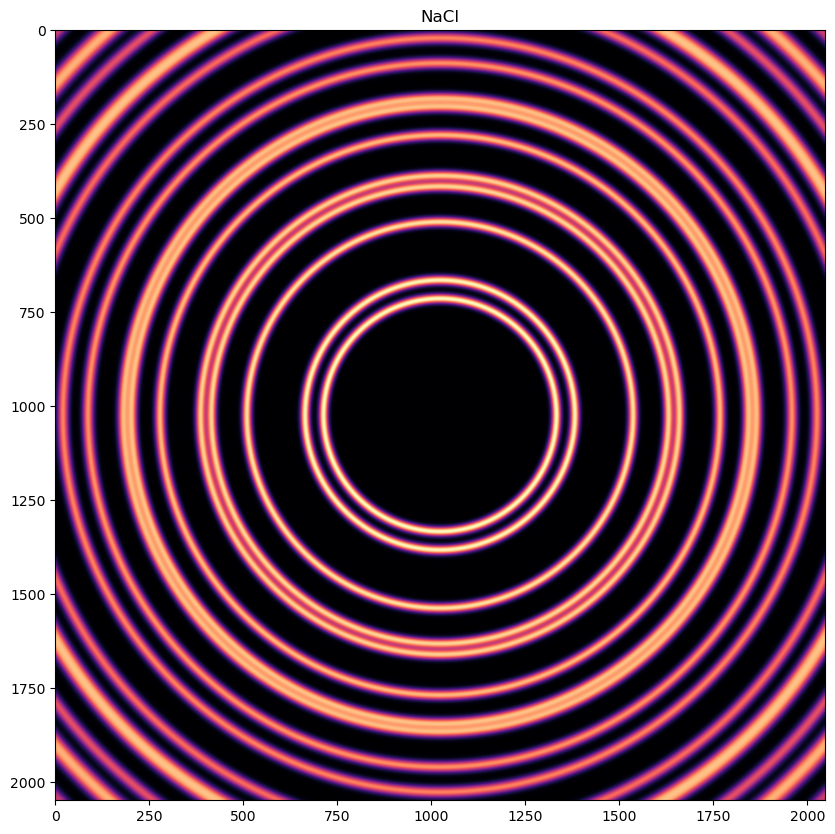

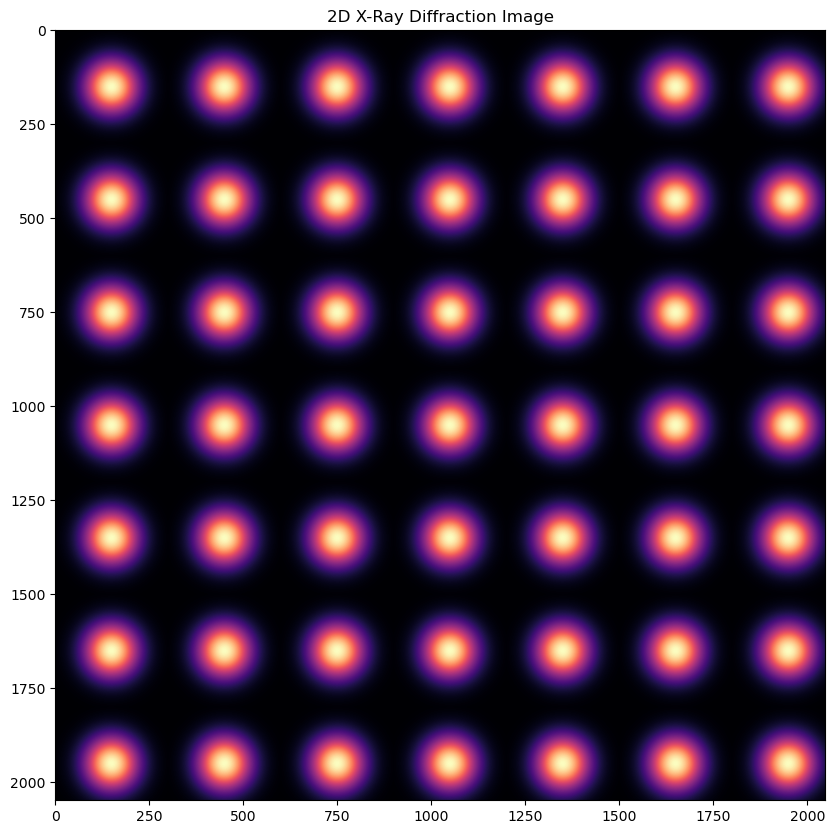

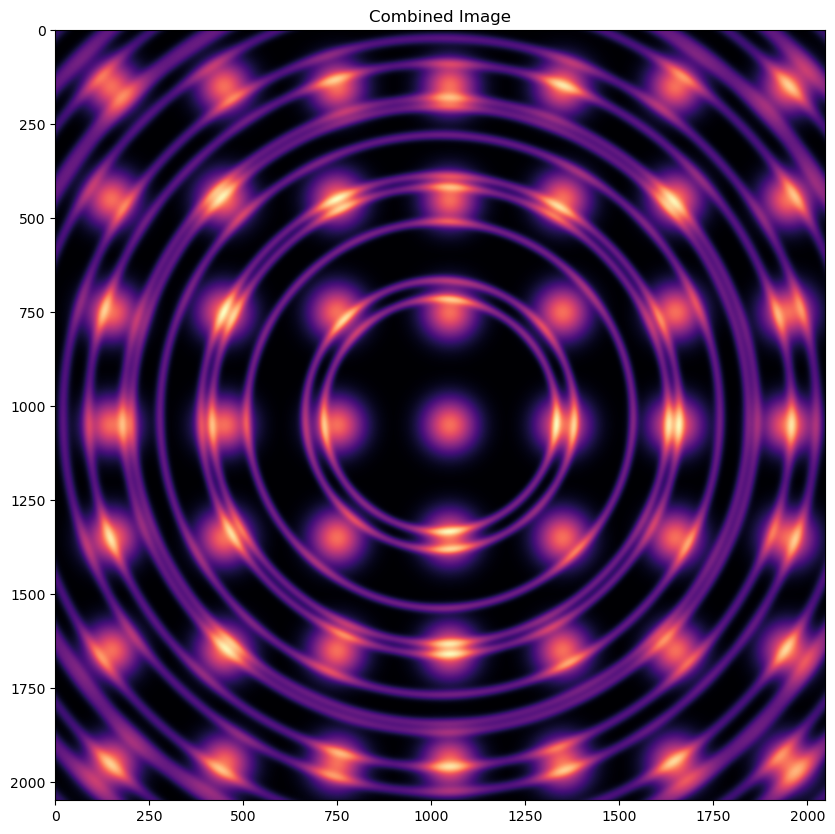

In [3]:
#creating synthetic data

#For ring creation
isotropic_signal = sim.create_isotropic(.4, .5e-10, cmap = 'magma')
#For spot creation
anisotropic_signal = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')
#combining signals 
thin_film = sim.combine_image(isotropic_signal, anisotropic_signal*2, cmap= 'magma')

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

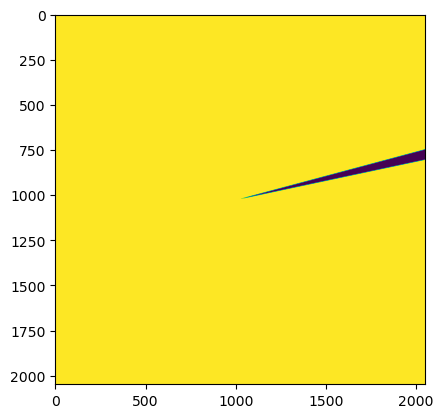

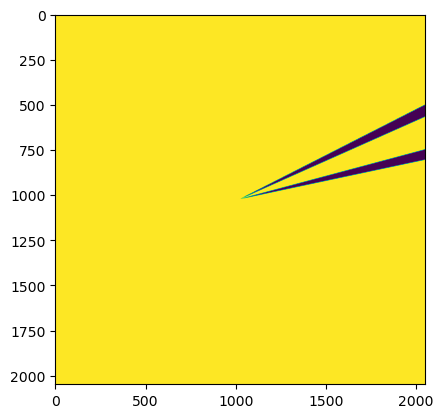

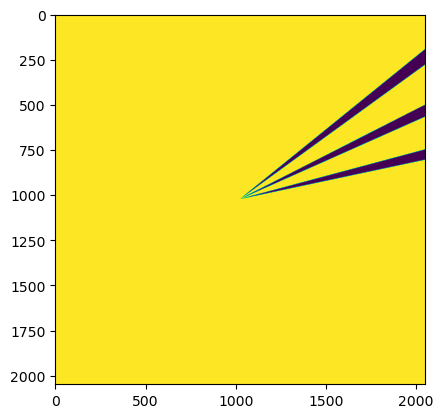

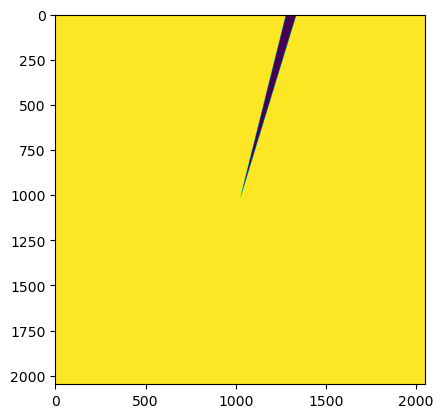

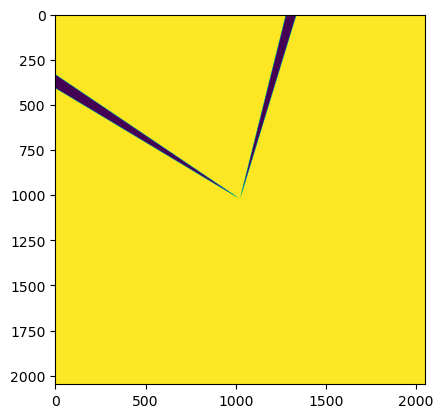

In [4]:
array, ai_pe = masking.make_chi_array(thin_film, .4, .5e-10)
masks = make_masks(array, [1,2,3], offset = 9, width = 3, gits = True)
masks_v2 = make_masks(array, [1,2], offset = 70, width = 3, gits = True)
mask_one = masks[0] 
mask_two = masks[1] 
mask_three = masks[2] 
mask_four = masks_v2[0] 
mask_five = masks_v2[1]

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


image_rotation executed in 0.0071 seconds
image_rotation executed in 0.0063 seconds
image_rotation executed in 0.0064 seconds
image_rotation executed in 0.0070 seconds
image_rotation executed in 0.0072 seconds
image_rotation executed in 0.0074 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0083 seconds
image_rotation executed in 0.0088 seconds
image_rotation executed in 0.0090 seconds
image_rotation executed in 0.0096 

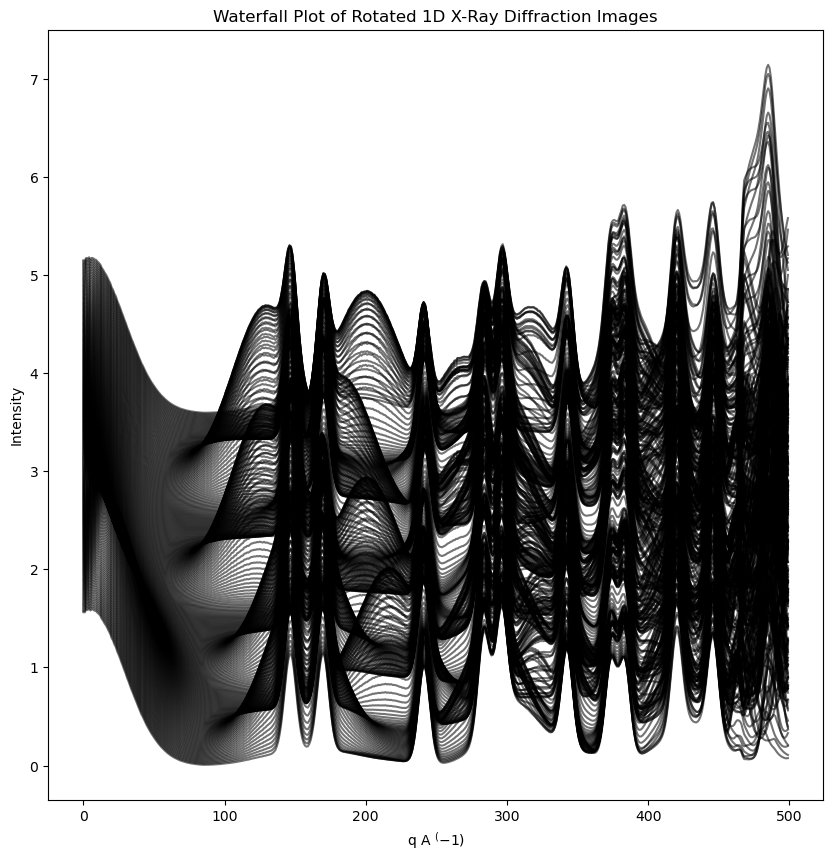

rotate_integrate_image_gpu executed in 7.8787 seconds


In [5]:
rotated_data = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_two)

Euclidean distance: 5.821
Error tracking:
[25750.458880797407, 25466.05866706861, 25334.32854249852, 25153.20077274531, 24892.29614984306, 24506.90297204738, 23931.326716488256, 23072.904394741676, 21813.76156454104, 20040.602436065965, 17737.89362183744, 15121.41414228586, 12589.963895655153, 10433.242688248638, 8706.506720990063, 7338.551726405285, 6238.536446127606, 5335.3348770524235, 4581.366218801779, 3946.69116053841, 3412.2460933190823, 2964.4630822638346, 2591.8733718382355, 2283.6154760493864, 2029.231836378197, 1819.0064017733678, 1644.3449712315391, 1497.989672240243, 1374.039660531891, 1267.8313927940098, 1175.7481800824023, 1095.0141939421292, 1023.5055845238026, 959.5927986706401, 902.0167055676012, 849.7950972214674, 802.1536051004382, 758.4748979476021, 718.2611032642259, 681.1057482758333, 646.6726523801451, 614.6800155317478, 584.8884676338484, 557.0921528002985, 531.1121138837857, 506.79138423507914, 483.9913160068432, 462.58878681312325, 442.4740251824674, 423.5488

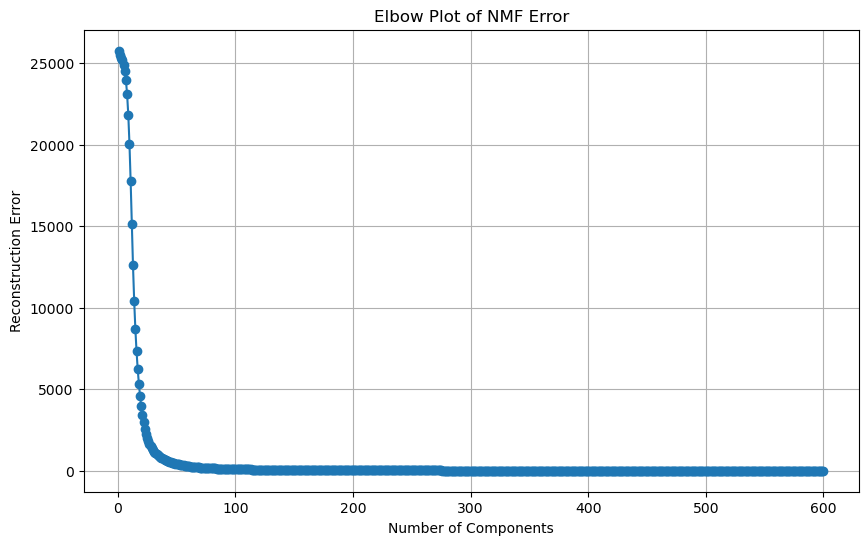

ValueError: Found array with dim 3. AgglomerativeClustering expected <= 2.

In [6]:
data_dict, iso_signal = iso.run_nmf_and_agg_cluster(np.array(rotated_data), 359, 15)